# Generate Plots

### Import Libraries and Data

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# from farhi
with open('sk_angles.pickle', 'rb') as handle:
    sk_angles = pickle.load(handle)

nus_mc_sampling =  np.array([.3033, .4075, .4726, .5157, .5476, .5721, .5915, 0.6073, 0.6203, 0.6314]) 

In [3]:
with open('data/mc_best_nus.pickle', 'rb') as handle:
    nus_mc = pickle.load(handle)
with open('data/mc_last_gamma_best_nus.pickle', 'rb') as handle:
    nus_mc_last_gamma = pickle.load(handle)
with open('data/mc_best_xs.pickle', 'rb') as handle:
    angles_mc = pickle.load(handle)

with open('data/xy_best_nus.pickle', 'rb') as handle:
    nus_xy = pickle.load(handle)
with open('data/xy_best_xs.pickle', 'rb') as handle:
    angles_xy = pickle.load(handle)

In [4]:
nus_mc= np.array(nus_mc)
nus_mc_last_gamma=np.concatenate((np.zeros(1),np.array(nus_mc_last_gamma)))
nus_xy= np.array(nus_xy)

### Plots appearing in manuscript

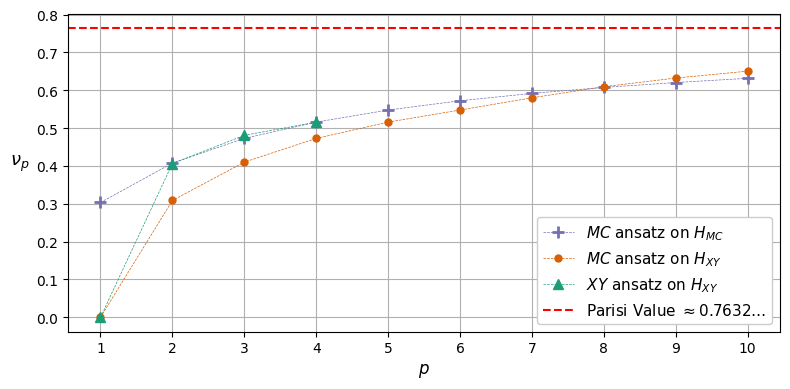

In [18]:
ps = np.arange(1, 11)
short_ps = np.arange(1, 5)
plt.rcParams['figure.figsize'] = [8, 4]
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis

ax.plot(ps, nus_mc_sampling, '+--', label=fr'$MC$ ansatz on $H_{{MC}}$', markersize=9, linewidth=.5,color='#7570b3', markeredgewidth=2)
ax.plot(ps, nus_mc, 'o--', label=fr'$MC$ ansatz on $H_{{XY}}$', markersize=5, linewidth=.5, color='#d95f02')
#ax.plot(1/ps, nus_mc_last_gamma, '^', label=r'MC ansatz only optimize $\gamma_p$', markersize=6)
ax.plot(short_ps, nus_xy, '^--', label=fr'$XY$ ansatz on $H_{{XY}}$', markersize=7, linewidth=.5, color='#1b9e77' )
 
# Horizontal line spanning the entire plot
ax.axhline(y=0.763166, linestyle='--', color='red', label=r"Parisi Value $\approx 0.7632\ldots$")

# Setting ticks and labels
ax.set_xticks(ps)

# Set axis labels with increased font size
ax.set_ylabel(r'$\nu_p$', fontsize=13, rotation=0, labelpad=12)
ax.set_xlabel(r'$p$', fontsize=12)

# Move legend inside the plot to the top right
ax.legend(loc='lower right', fontsize=11, framealpha=1)

# Enable grid
ax.grid()
plt.tight_layout()
# Save the figure
fig.savefig('plots/nus.pdf')

plt.show()

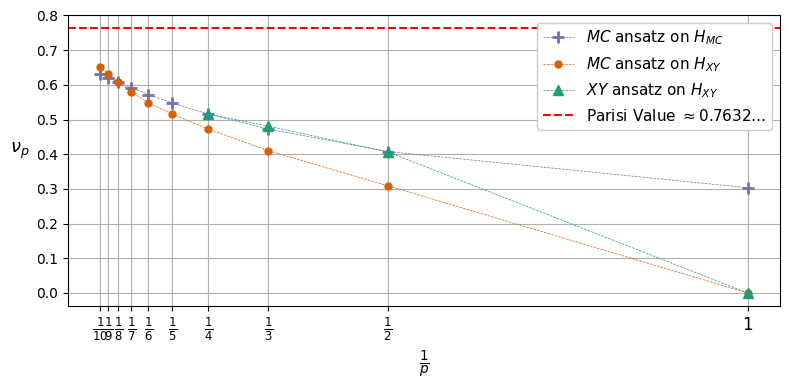

In [19]:
ps = np.arange(1, 11)
short_ps = np.arange(1, 5)
plt.rcParams['figure.figsize'] = [8, 4]
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis

ax.plot(1/ps, nus_mc_sampling, '+--', label=fr'$MC$ ansatz on $H_{{MC}}$', markersize=9, linewidth=.5,color='#7570b3', markeredgewidth=2)
ax.plot(1/ps, nus_mc, 'o--', label=fr'$MC$ ansatz on $H_{{XY}}$', markersize=5, linewidth=.5, color='#d95f02')
#ax.plot(1/ps, nus_mc_last_gamma, '^', label=r'MC ansatz only optimize $\gamma_p$', markersize=6)
ax.plot(1/short_ps, nus_xy, '^--', label=fr'$XY$ ansatz on $H_{{XY}}$', markersize=7, linewidth=.5, color='#1b9e77' )
 
# Horizontal line spanning the entire plot
ax.axhline(y=0.763166, linestyle='--', color='red', label=r"Parisi Value $\approx 0.7632\ldots$")

# Setting ticks and labels
ax.set_xticks(1/ps)
ax.set_xticklabels([1]+[f"$\\frac{{1}}{{{p}}}$" for p in ps[1:]], fontsize=12)  # Increase font size

# Set axis labels with increased font size
ax.set_ylabel(r'$\nu_p$', fontsize=13, rotation=0, labelpad=12)
ax.set_xlabel(r'$\frac{1}{p}$', fontsize=14)

# Move legend inside the plot to the top right
ax.legend(loc='upper right', fontsize=11, framealpha=1)

# Enable grid
ax.grid()
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15) 
# Save the figure
fig.savefig('plots/nus_1_over_p.pdf')

plt.show()

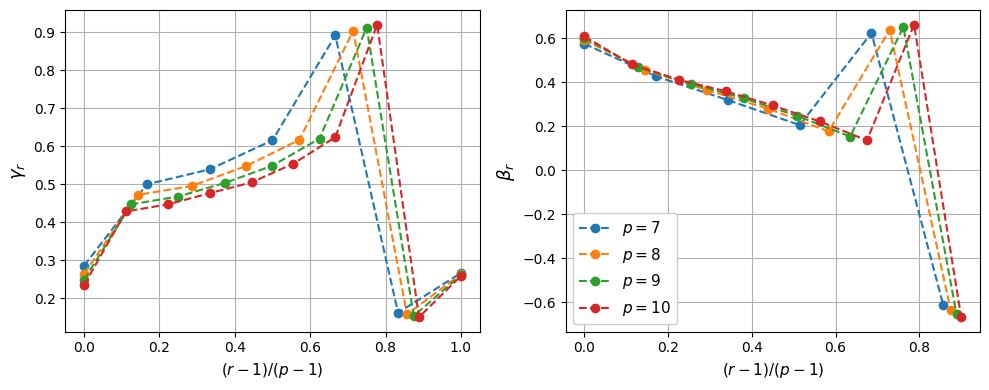

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ps = [7,8,9,10]

# Plotting for each p value
for p_idx, p in enumerate(ps):
    if angles_mc[p-1][0] <0:
        ax[0].plot(np.linspace(0, 1, p), -angles_mc[p-1][:p], 'o--', label=f'$p={p}$')
        ax[1].plot(np.linspace(0, (p-1)/p, p-1), -angles_mc[p-1][p:-1], 'o--', label=f'$p={p}$')
    else:   
        ax[0].plot(np.linspace(0, 1, p), angles_mc[p-1][:p], 'o--', label=f'$p={p}$')
        ax[1].plot(np.linspace(0, (p-1)/p, p-1), angles_mc[p-1][p:-1], 'o--', label=f'$p={p}$')

# Move legend inside the plot to the top right
ax[1].legend(loc='lower left', fontsize=11, framealpha=1)

# Set labels and grid
ax[0].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[0].set_ylabel(r'$\gamma_r$', fontsize=13)
ax[0].grid()

ax[1].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[1].set_ylabel(r'$\beta_r$', fontsize=13)
ax[1].grid()

# Adjust layout to make room for labels and save the figure
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

fig.savefig('plots/angles_mc.pdf')

plt.show()

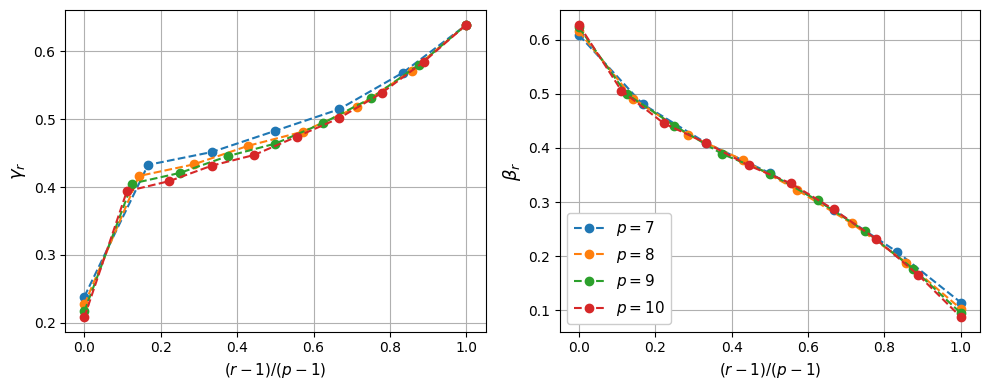

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ps = [7,8,9,10]

# Plotting for each p value
for p_idx, p in enumerate(ps):

    ax[0].plot(np.linspace(0, 1, p), sk_angles[p][0], 'o--', label=f'$p={p}$')
    ax[1].plot(np.linspace(0, 1, p), sk_angles[p][1], 'o--', label=f'$p={p}$')

# Move legend inside the plot to the top right
ax[1].legend(loc='lower left', fontsize=11, framealpha=1)

# Set labels and grid
ax[0].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[0].set_ylabel(r'$\gamma_r$', fontsize=13)
ax[0].grid()

ax[1].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[1].set_ylabel(r'$\beta_r$', fontsize=13)
ax[1].grid()

# Adjust layout to make room for labels and save the figure
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

fig.savefig('plots/angles_mc_sampling.pdf')

plt.show()

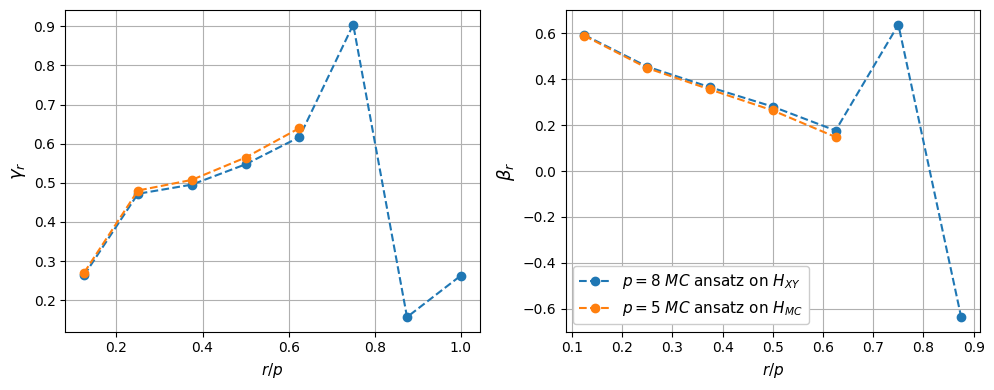

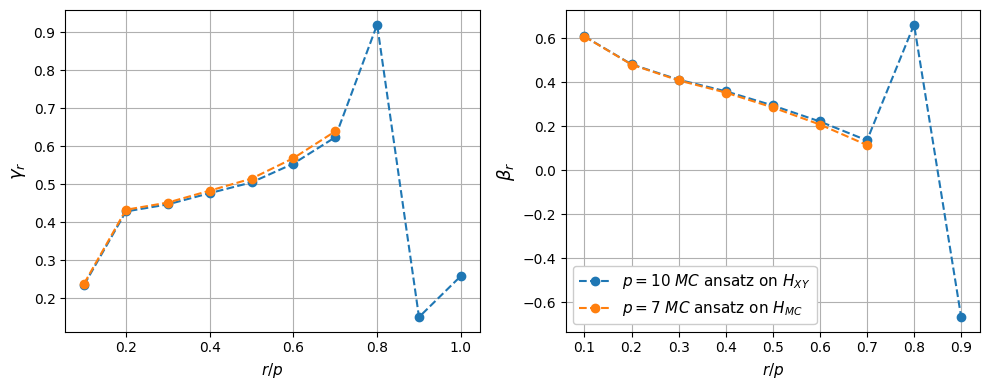

In [53]:

ps = [8,10]

# Plotting for each p value
for p_idx, p in enumerate(ps):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    if angles_mc[p-1][0] <0:
        ax[0].plot(np.linspace(1/p, 1, p), -angles_mc[p-1][:p], 'o--', label=fr'$p={p}$ $MC$ ansatz on $H_{{XY}}$')
        ax[1].plot(np.linspace(1/p, (p-1)/p, p-1), -angles_mc[p-1][p:-1], 'o--', label=fr'$p={p}$ $MC$ ansatz on $H_{{XY}}$')
    else:   
        ax[0].plot(np.linspace(1/p, 1, p), angles_mc[p-1][:p], 'o--', label=fr'$p={p}$ $MC$ ansatz on $H_{{XY}}$')
        ax[1].plot(np.linspace(1/p, (p-1)/p, p-1), angles_mc[p-1][p:-1], 'o--', label=fr'$p={p}$ $MC$ ansatz on $H_{{XY}}$')

    ax[0].plot(np.linspace(1/p, (p-3)/(p), p-3), sk_angles[p-3][0], 'o--', label=fr'$p={p-3}$ $MC$ ansatz on $H_{{MC}}$')
    ax[1].plot(np.linspace(1/p, (p-3)/(p), p-3), sk_angles[p-3][1], 'o--', label=fr'$p={p-3}$ $MC$ ansatz on $H_{{MC}}$')

    # Move legend inside the plot to the top right
    ax[1].legend(loc='lower left', fontsize=11, framealpha=1)

    # Set labels and grid
    ax[0].set_xlabel(r'$r/p$', fontsize=11)
    ax[0].set_ylabel(r'$\gamma_r$', fontsize=13)
    ax[0].grid()

    ax[1].set_xlabel(r'$r/p$', fontsize=11)
    ax[1].set_ylabel(r'$\beta_r$', fontsize=13)
    ax[1].grid()

    # Adjust layout to make room for labels and save the figure
    plt.tight_layout()
    #plt.subplots_adjust(bottom=0.15)
    plt.savefig(f"plots/p_{p}_mc_angles_on_H_mc_vs_H_xy.pdf")
    plt.show()
    

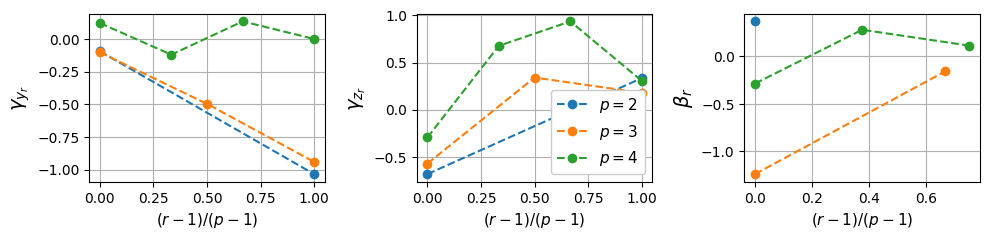

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,2.5))
ps = [2, 3,4]

# Plotting for each p value
for p_idx, p in enumerate(ps):
    ax[0].plot(np.linspace(0, 1, p), angles_xy[p-1][:p], 'o--', label=f'$p={p}$')
    ax[1].plot(np.linspace(0, 1, p), angles_xy[p-1][p:2*p], 'o--', label=f'$p={p}$')
    ax[2].plot(np.linspace(0, (p-1)/p, p-1), angles_xy[p-1][2*p:-1], 'o--', label=f'$p={p}$')

# Move legend inside the plot to the top right
ax[1].legend(loc='lower right', fontsize=11, framealpha=1)

# Set labels and grid
ax[0].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[0].set_ylabel(r'$\gamma_{y_r}$', fontsize=14)
ax[0].grid()

ax[1].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[1].set_ylabel(r'$\gamma_{z_r}$', fontsize=14)
ax[1].grid()

ax[2].set_xlabel(r'$(r-1)/(p-1)$', fontsize=11)
ax[2].set_ylabel(r'$\beta_r$', fontsize=14)
ax[2].grid()

# Adjust layout to make room for labels and save the figure
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

fig.savefig('plots/angles_xy.pdf')

plt.show()

### Plots not in manuscript



##### Scaling with p

These results ultimately did not make it into the final submission. The idea is to test the performance of the algorithms as the depth p increased and to see if the energy converges to the Parisi value. The results are as follows:

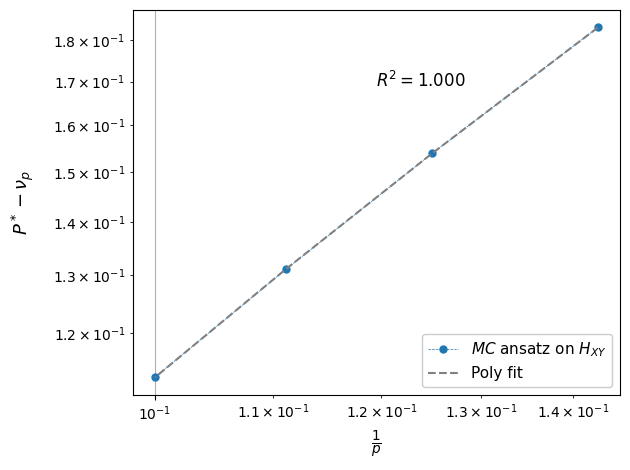

1.6430934771543027 0.0009239759350026862 -0.05147946271402677 0.00011162421136077917 0.9999993675495613
$P^*-\nu_p$ = (1.643e+00 $\pm$ 9.240e-04)(1/p) + (-5.148e-02 $\pm$ 1.116e-04


In [49]:
# Given data
ps = np.arange(7, 11)
y_values = 0.763166 - nus_mc[-4:]

# Fit a linear polynomial to the data (degree 1)
coefficients, cov_matrix = np.polyfit(1/ps, y_values, 1, cov=True)
polynomial_fit = np.polyval(coefficients, 1/ps)

# Extract slope, intercept and their uncertainties (square root of diagonal elements of covariance matrix)
slope, intercept = coefficients
slope_err, intercept_err = np.sqrt(np.diag(cov_matrix))

# Compute R-squared
y_pred = np.polyval(coefficients, 1/ps)
ss_res = np.sum((y_values - y_pred) ** 2)
ss_tot = np.sum((y_values - np.mean(y_values)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1)

# Scatter plot with data points
ax.plot(1/ps, y_values, 'o--', label=fr'$MC$ ansatz on $H_{{XY}}$', markersize=5, linewidth=.5)

# Add the polynomial fit
fit_label = fr'Poly fit'
ax.plot(1/ps, polynomial_fit, '--', label=fit_label, color='grey')

# Display R^2 value
ax.text(0.5, 0.8, f'$R^2 = {r_squared:.3f}$', transform=ax.transAxes, fontsize=12)

# Set axis labels
ax.set_ylabel(r'$P^*-\nu_p$', fontsize=13, rotation=90, labelpad=12)
ax.set_xlabel(r'$\frac{1}{p}$', fontsize=14)

# Legend and grid
ax.legend(loc='lower right', fontsize=11, framealpha=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()

# Adjust layout and save the figure
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.savefig("plots/mc_ansatz_H_xy_parisi_scaling_with_errors.pdf")

plt.show()

print(slope, slope_err, intercept, intercept_err, r_squared)
print(fr'$P^*-\nu_p$ = ({slope:.3e} $\pm$ {slope_err:.3e})(1/p) + ({intercept:.3e} $\pm$ {intercept_err:.3e}')

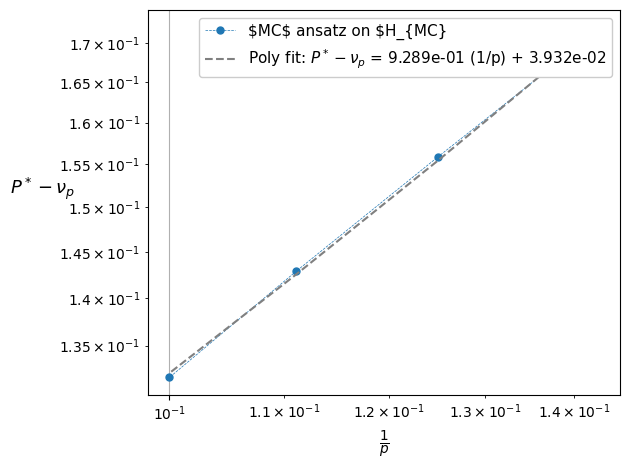

In [50]:
ps = np.arange(7, 11)
coefficients = np.polyfit(1/ps, 0.763166 - nus_mc_sampling[-4:], 1)
polynomial_fit = np.polyval(coefficients, 1/ps)

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis
ax.plot(1/ps, 0.763166 - nus_mc_sampling[-4:], 'o--', label=fr'$MC$ ansatz on $H_{{MC}}', markersize=5, linewidth=.5)

# Add the polynomial fit
ax.plot(1/ps, polynomial_fit, '--', label=fr'Poly fit: $P^*-\nu_p$ = {coefficients[0]:.3e} (1/p) + {coefficients[1]:.3e}', color='grey')

# Setting ticks and labels
#ax.set_xticks(ps)

# Set axis labels with increased font size
ax.set_ylabel(r'$P^*-\nu_p$', fontsize=13, rotation=0, labelpad=12)
ax.set_xlabel(r'$\frac{1}{p}$', fontsize=14)

# Move legend inside the plot to the top right
ax.legend(loc='upper right', fontsize=11, framealpha=1)
ax.set_xscale('log')
ax.set_yscale('log')
# Enable grid
ax.grid()
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15) 
plt.savefig("plots/mc_ansatz_H_mc_parisi_scaling.pdf")

plt.show()